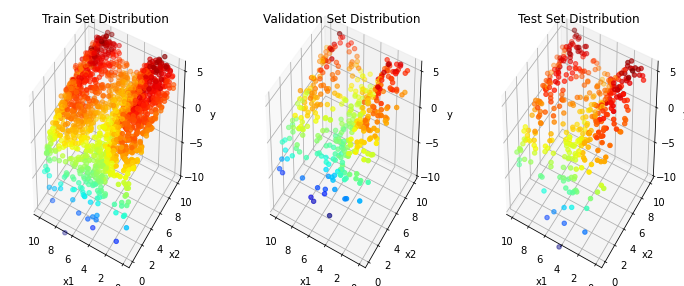

In [2]:
# 1. Data Generation(Preparation)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# ====== Generating Dataset ====== #
num_data = 2400
x1 = np.random.rand(num_data) * 10          # numpy의 random.rand() 함수를 사용하면 n개의 랜덤 샘플을 0~1의 uniform distribution에서 샘플링할 수 있음
x2 = np.random.rand(num_data) * 10          # 여기서 10을 곱함으로써 0~10 사이의 값이 랜덤하게 할당
# print(x1)                         # x1의 원소를 확인
# print(x1.shape)                   # x1의 값이 2400개 인것을 확인할 수 있음. 항상 print()로 shape를 출력하여 차원의 형태를 확인해야함. 나중에 차원에서 꼬일 경우가 많음

e = np.random.normal(0, 0.5, num_data)      
X = np.array([x1, x2]).T                    # T(Transpose)를 붙였을때(2400, 2)와 안 붙였을 때(2, 2400)의 X.shape 비교해보기
# print(X, X.shape)                         # 보통 첫 번째 Dimenssion 값이 데이터셋의 갯수를 의미하므로 통일해야함
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e


# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]


# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5))                                                # 여러 개의 그래프를 다룰떄는 figure 틀을 먼저 정해주는게 정석
ax1 = fig.add_subplot(1, 3, 1, projection='3d')                                 # fig.add_subplot(figsize_row, figsize_col, index))
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')       # indexing
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)                                                            # z축의 범위를 정하는 것
ax1.view_init(40, -60)                                                          # 3d일때 각도를 조정할 수 있음
ax1.invert_xaxis()                                                              # (0, 0, 0)를 지정할 수 있음

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

In [3]:
# https://github.com/heartcored98/Standalone-DeepLearning/blob/master/Lec2/Lab2_pytorch_regression_demo.ipynb
# 2. Hypothesis Define(Model Define)
import torch
import torch.nn as nn                                                           # https://pytorch.org/docs/stable/nn.html

class LinearModel(nn.Module):                                                   # Training에 필요한 nn.Module class를 상속
    def __init__(self): 
        super(LinearModel, self).__init__()                                     # 상속후에는 반드시 사용
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True)       # nn.Linear(input size, output size, bias=True(바이어스가 존재함을 나타냄))
    
    def forward(self, x):                                                       # pytorch가 사용하는 지정된 함수 이름 forward
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴        # 모델에 x가 들어 왔을 때 어떻게 계산해서 predict할지를 정의
        return self.linear(x)                                                   # x가 'H=XW+b'의 X에 들어가서 Linear Model 안의 W와 곱해지고 b와 더해지면서 결과값을 찾음
    
# 내부에 있는 값 확인해보기
# lm = LinearModel()
# print(lm.linear.weight)
# print(lm.linear.bias)
    

class MLPModel(nn.Module):                                                      # 인스턴스(sample) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴함
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
    # 인스턴스(샘플) x가 input으로 들어왔을 때 모델이 예측하는 y값을 리턴
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

lm = LinearModel()          # LinearModel을 정의해서 사용해보자!
# print(lm.linear.weight)   # W     --> tensor([[-0.6968,  0.3799]], requires_grad=True)  랜덤
# print(lm.linear.bias)     # bias  --> tensor([-0.0930], requires_grad=True)

In [4]:
# 3. Cost Function Define(Loss Function Define)
reg_loss = nn.MSELoss()                                                         # Loss Fuction이 잘 작동되는지 간단하게 테스트해서 확인하는 습관도 좋음

# uncommnet for testing Loss Function
# print(type([0,0,0,0]))
test_pred_y = torch.Tensor([0,0,0,0])
test_true_y = torch.Tensor([0,1,0,1])
# print(type(torch.Tensor([0,1,0,1])))                                          # Tensor로 형 변환하기 위한 torch.Tensor를 사용

# Loss Function이 잘 되는지 확인해보기
print(reg_loss(test_pred_y, test_true_y))                                       # |(0-1) + (0-1)|/전체 데이터 갯수(4) = 0.5
print(reg_loss(test_true_y, test_true_y))                                       # 모두 정답일 때 차가 없으니 값이 0

tensor(0.5000)
tensor(0.)


In [5]:
# 4. Train&Evaluation
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

# ====== Construct Model ====== #
# model = LinearModel()             # Linear Model 하나 생성
# print(model.linear.weight)
# print(model.linear.bias)

model = MLPModel()                                                              # Model 생성
# 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드
# print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) 


# ===== Construct Optimizer ====== #
lr = 0.005                                              # Learning Rate(원할한 학습을 위해 손을 많이 탑니다)
optimizer = optim.SGD(model.parameters(), lr=lr)        # Optimizer를 생성(Adam, RMSprop, Adamdel) 등 # 'model.parameters'는 W, b 값을 받음
# print(model.parameter)

# 시각화를 위해 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들기
# 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들어줌(For Monitorig)
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

'''
* 만약 10만개의 데이터가 있으면 메모리 부족 현상이 있을수 있으므로 
    100개씩 끊어서 Training을 시킴 --> batch or mini-batch
* iteration: 파라미터를 한번 업데이트되는것, epoch과 다름
    --> mini-batch로 cost, Gradient값을 구하고 업데이트 시키는 것이 1 iteration
* Conclusio: 데이터가 만개가 있고 batch-size가 100으로 잡으면 100개의 chunck가 나옴
    100번의 iteration이 돌면 1 epoch가 완성되는것

* Epoch means one pass over the full training set
* Batch means that you use all your data to compute the gradient during one iteration.
* Mini-batch means you only take a subset of all your data during one iteration.
'''

epoch = 4000                                    # 학습횟수 지정, 데이터를 모델한테 몇번 보여주면서 학습시키는 지
                                                # 1600개의 데이터가 있을 때, 1600 데이터가 한번 업데이트 되면 1 epoch
for i in range(epoch):
    
    # ====== Train ====== #
    # model.train()을 해서 train() 모드로 세팅하는 습관을 가지자. train, vali, eval 마다 사용해야하거나 생략해야하는 layer가 있기도 하기 때문
    model.train()                                       # model을 train 모드로 세팅. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경 (나중 실습에서 쓸 겁니다)
    optimizer.zero_grad()                               # optimizer에 남아있을 수도 있는 잔여 gradient를 0으로 다 초기화
    # print(type(train_X))                              # numpy.ndarray

    input_x = torch.Tensor(train_X)                     # torch 연산을 위해 type이 narray인 'train_x'를 Tensor로 바꿔줌
    # print(input_x)                                    # input_x tensor 값, 차원 확인, CNN 할 때 차원과의 전쟁이 시작됨...(size mismatch...)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)                             # 이걸 했을 때 오류가 없어야함. 실무자는 한번에 되도 의아해함...
    #print(input_x.shape, true_y.shape, pred_y.shape)   # 각 input과 output의 dimension을 체크
    
    loss = reg_loss(pred_y.squeeze(), true_y)           # squeeze: 불필요한 차원을 날려서 차원을 맞출때 사용
    # print(loss)
    loss.backward()                                     # backward()를 통해서 gradient 구하기, optimizer가 감당하는 w,b에 따라 loss 편미분 작업하여 gradient 구함
    optimizer.step()                                    # step()을 통해서 gradient를 바탕으로 파라미터를 업데이트
    list_epoch.append(i)                                # 몇 번째 epoch인지 
    list_train_loss.append(loss.detach().numpy())       # detach(): Gradient 값은 분리하고 순수한 loss값만 뽑기 위해 사용 = item()으로 해결가능, numpy(): 현재 tensor인 값을 numpy롤 바꾸기 위함
    # loss.item()                                       
    
    
    # ====== Validation ====== #
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    # ====== Evaluation ======= #
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        
        # ====== Calculate MAE ====== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) # sklearn 쪽 함수들은 true_y가 먼저, pred_y가 나중에 인자로 들어가야함
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        # ====== True Y Scattering ====== #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        # ====== Just for Visualizaing with High Resolution ====== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

Output hidden; open in https://colab.research.google.com to view.

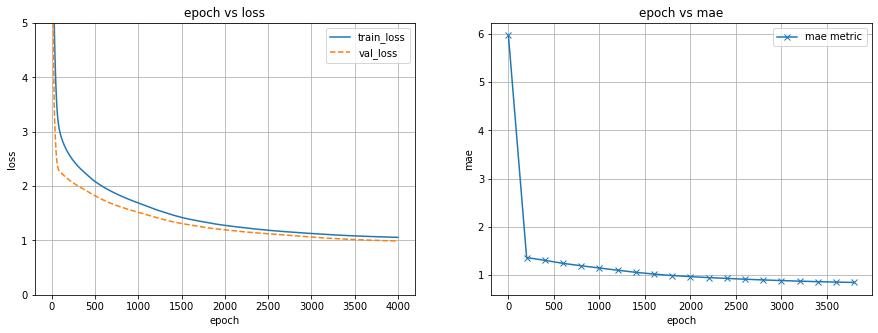

In [6]:
# 5.Report Experiment
fig = plt.figure(figsize=(15,5))

# Loss Fluctuation
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# Metric Fluctuation
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')

plt.show()